# Statistics Assignment-2 
# (CIs & Hypothesis) (DS-DE 07 TR)


- Opened: Friday, 15 December 2023, 12:01 AM
- Due: Wednesday, 20 December 2023, 11:59 PM

In [36]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


### CONFIDENCE INTERVALS

- *EXERCISE 1*  


What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees.

Give a 99% confidence interval for the average body temperature of healthy people.

In [21]:
sample_mean = 98.25
sample_std_dev = 0.73
sample_size = 130

In [22]:
sem = sample_std_dev / np.sqrt(sample_size)
sem

0.06402523540941313

In [23]:
ci_z = stats.norm.interval(0.99, sample_mean, sem)
ci_z

(98.08508192246582, 98.41491807753418)

- *EXERCISE 2* 

The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [4]:
sample_mean = 5.4
sample_std_dev = 3.1
sample_size = 500
sem = sample_std_dev / np.sqrt(sample_size)


In [6]:
stats.t.interval(0.95, sample_size-1, loc=sample_mean, scale=sem)

(5.127617354510309, 5.672382645489692)

### HYPOTHESIS TESTING

- *EXERCISE 3*


The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [ ]:
"""
ho :    mu >= 13.20
h1 :    mu < 13.20

"""

In [18]:
mu = 13.20  
sigma = 2.50  
n = 40  
x_bar = 12.20  
alpha = 0.01

z_test_statistic = (x_bar - mu) / (sigma / (n ** 0.5))

p_value = stats.norm.cdf(z_test_statistic)

print(f"Test Statistic: {z_test_statistic}")
print(f"P-value: {p_value}")
print("-"*30)
print('p_value < alpha')
print("Reject: The company pays suboptimal wages.")


# Check the test statistic and P-value


Test Statistic: -2.5298221281347035
P-value: 0.005706018193000824
------------------------------
p_value < alpha
Reject: The company pays suboptimal wages.


- *EXERCISE 4*

Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils
https://docs.google.com/spreadsheets/d/1f2odmgDboIVuSV-A5gmuC25ppqQ5g1OIIF4h5EOqUcI/edit


CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [ ]:
# h0 : mu1 = mu2        The average shear strength of the two types of soils is the same.

# h1 : mu1 != mu2       The average shear strength of the two types of soils is different.

In [25]:
soil1 = np.array([1.442, 1.943, 1.11, 1.912, 1.553, 1.641, 1.499, 1.347, 1.685, 1.578, 
                  1.866, 1.653, 1.665, 1.64, 1.976, 1.754, 1.589, 1.976, 1.863, 1.932, 
                  1.57, 1.613, 2.054, 1.55, 1.714, 1.896, 1.737, 1.74, 1.708, 1.548])

soil2 = np.array([1.364, 1.878, 1.337, 1.828, 1.371, 1.428, 1.119, 1.373, 1.589, 1.714, 
                  1.26, 1.492, 1.395, 1.778, 1.611, 1.202, 1.542, 1.094, 1.557, 1.053, 
                  1.183, 1.367, 1.144, 1.151, 1.561, 1.192, 1.489, 1.379, 1.501, 1.277,
                  1.593, 1.172, 1.51, 1.74, 1.355])


In [36]:
statistic, levene_p_value = stats.levene(soil1, soil2)

print(f'{levene_p_value} > 0.05')
print("Assumption satisfied: Variances are equal (homogeneous)")
    


0.5767018253541134 > 0.05
Assumption satisfied: Variances are equal (homogeneous)


In [26]:
# Two-sample independent t-test
t_statistic, p_value = stats.ttest_ind(soil1, soil2, equal_var=True)

print(f"T-test Statistic: {t_statistic}")
print(f"P-value: {p_value}")
print("-"*30)

print('p_value < 0.01')
print("Reject: The average shear strength is different between the two types of soil.")



T-test Statistic: 5.1681473319343345
P-value: 2.59322873235282e-06
------------------------------
p_value < 0.01
Reject: The average shear strength is different between the two types of soil.


- *EXERCISE 5*

 The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset


Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.


CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [10]:
df = pd.read_csv(r'C:\Users\User\Desktop\CW Statistics\assigments\2015 PISA Test - Sheet1.csv')
df

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [17]:
df['Continent_Code'].value_counts(dropna=False)

Continent_Code
EU     37
AS     17
SA      7
NaN     5
OC      2
AF      2
Name: count, dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.groupby('Continent_Code')['Math'].describe()

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,363.212100,5.099513,359.6062,361.409150,363.21210,365.015050,366.8180
AS,17.0,466.216647,64.356490,380.2590,403.833200,459.81600,531.296100,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.040100,489.72870,503.722000,521.2506
OC,2.0,494.559750,0.938401,493.8962,494.227975,494.55975,494.891525,495.2233
SA,7.0,402.887700,18.128894,377.0695,388.102200,409.03330,417.617650,422.6714


In [30]:
df.groupby('Continent_Code')['Science'].describe()


,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,381.074250,7.536556,375.7451,378.409675,381.07425,383.738825,386.4034
AS,17.0,467.945847,56.671371,386.4854,417.611200,456.48360,523.277400,555.5747
EU,37.0,478.299381,34.450616,383.6824,460.774900,490.22500,501.936900,534.1937
OC,2.0,511.648700,2.340241,509.9939,510.821300,511.64870,512.476100,513.3035
SA,7.0,421.747186,18.470319,396.6836,408.205450,424.59050,433.794600,446.9561


In [31]:
df.groupby('Continent_Code')['Reading'].describe()


,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,355.457400,7.916909,349.8593,352.658350,355.45740,358.256450,361.0555
AS,17.0,454.059682,57.048962,346.5490,408.102200,433.54230,508.690500,535.1002
EU,37.0,476.164608,37.720545,351.7415,452.514300,487.25010,499.814600,526.4247
OC,2.0,506.085650,4.504341,502.9006,504.493125,506.08565,507.678175,509.2707
SA,7.0,425.359229,19.709688,397.5414,416.126900,425.30310,431.922700,458.5709


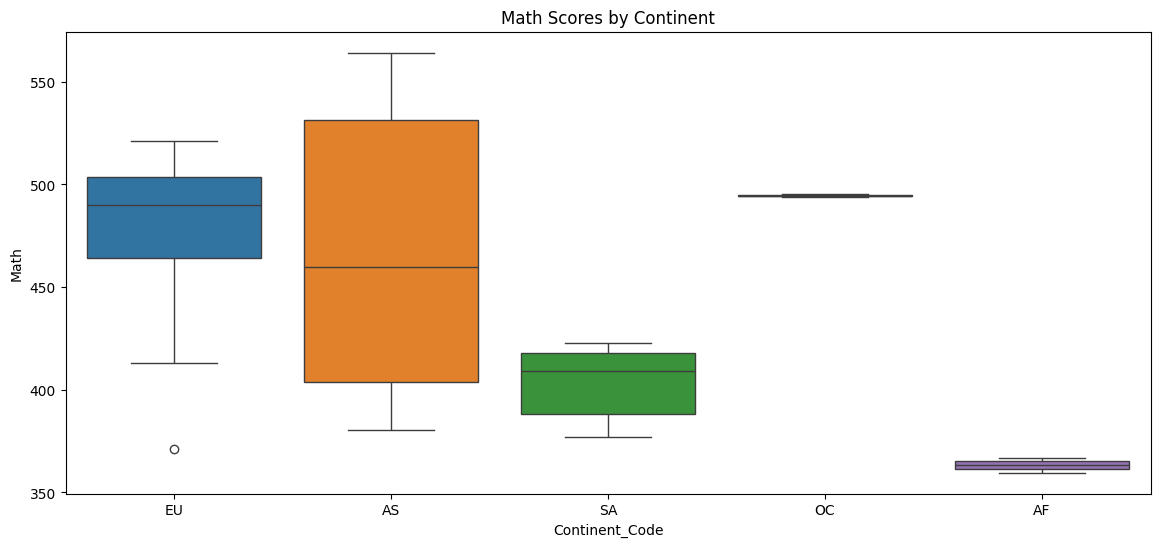

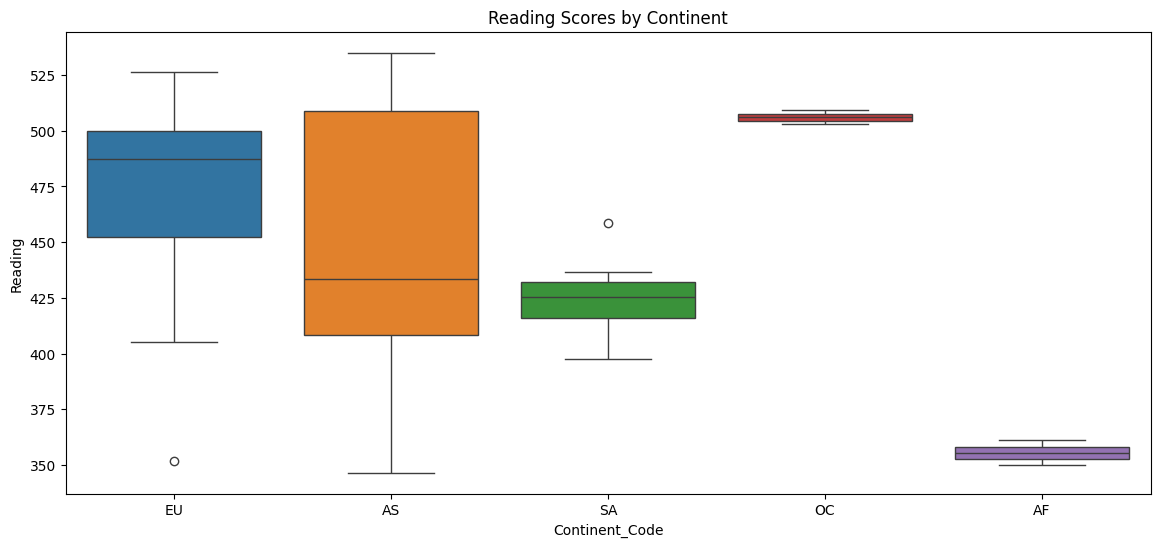

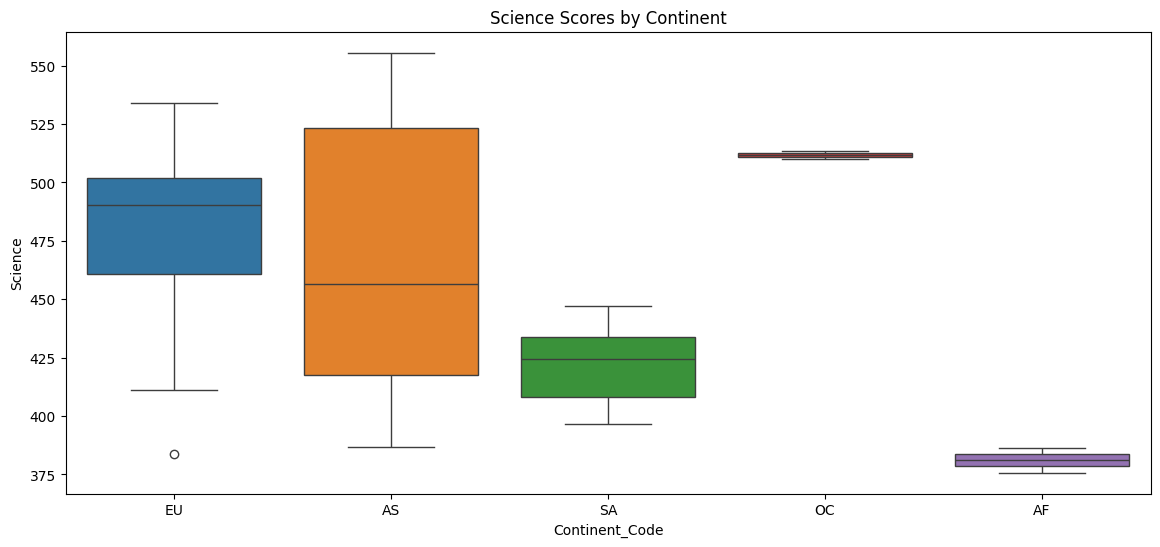

In [45]:
for col in ['Math','Reading','Science']:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='Continent_Code', y=col, data=df, hue='Continent_Code')
    plt.title(f'{col} Scores by Continent')
    plt.show()

In [34]:
df[df['Continent_Code'] == 'EU']['Math'].mean()

477.98144864864867

In [46]:
df[df['Continent_Code'] == 'AS']['Math'].mean()


466.21664705882347

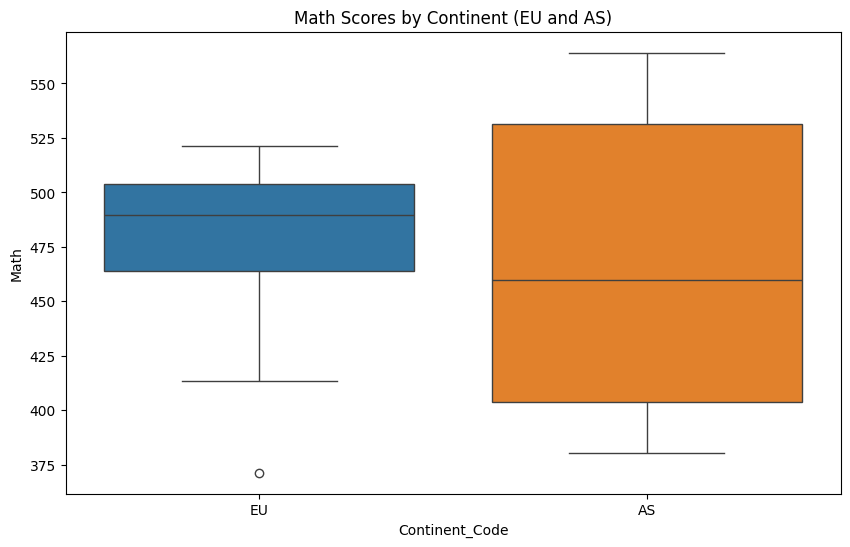

In [55]:
filtered_df = df[df['Continent_Code'].isin(['EU', 'AS'])]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Continent_Code', y='Math', data=filtered_df, hue='Continent_Code')
plt.title('Math Scores by Continent (EU and AS)')
plt.show()

In [ ]:
# H0 (Null Hypothesis): There is no significant difference in the average math scores between European (EU) and Asian (AS) countries.

# H1 (Alternative Hypothesis): There is a significant difference in the average math scores between European (EU) and Asian (AS) countries.

In [58]:
eu_math_scores = df[df['Continent_Code'] == 'EU']['Math']
as_math_scores = df[df['Continent_Code'] == 'AS']['Math']


t_statistic, p_value = stats.ttest_ind(eu_math_scores, as_math_scores, equal_var=True)
print(f"T-test İstatistiği: {t_statistic}")
print(f"P-value: {p_value}")

T-test İstatistiği: 0.870055317967983
P-value: 0.38826888111307345


In [ ]:
# p_value > alpha   
# 0.38  > 0.05

# Fail to reject H0: There is no significant difference in the average math scores between European (EU) and Asian (AS) countries.